<a href="https://colab.research.google.com/github/merazAfridi/MonkeypoxPrediction_NeuralNetworks/blob/main/MonkeyFox_NeuralNetwork_Meraz_Afridi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np

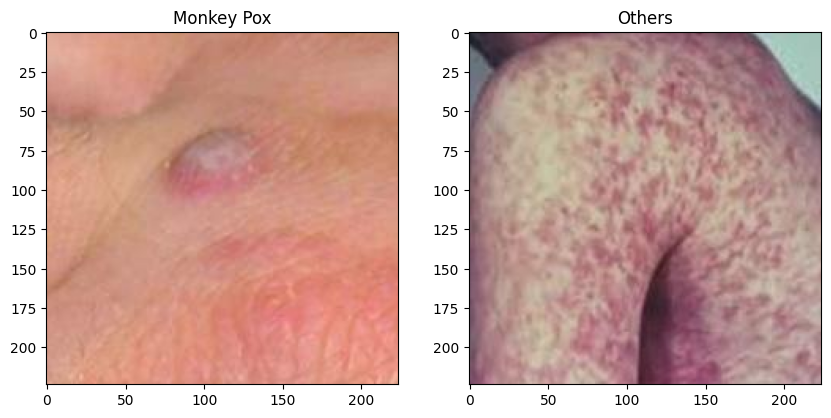

In [ ]:
import os

# Get the path to the dataset folder
dataset_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/Dataset NN'
monkey_pox_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/Dataset NN/Monkey Pox'
others_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/Dataset NN/Others'

# Load the first image from the monkey pox folder
monkey_pox_image_path = os.path.join(monkey_pox_path, os.listdir(monkey_pox_path)[0])
monkey_pox_image = plt.imread(monkey_pox_image_path)

# Load the first image from the others folder
others_image_path = os.path.join(others_path, os.listdir(others_path)[0])
others_image = plt.imread(others_image_path)

# Display the images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(monkey_pox_image)
plt.title("Monkey Pox")

plt.subplot(1, 2, 2)
plt.imshow(others_image)
plt.title("Others")

plt.show()

In [ ]:
# Load the images from the dataset folder
images = []
labels = []

for folder in os.listdir(dataset_path):
  folder_path = os.path.join(dataset_path, folder)
  for image_path in os.listdir(folder_path):
    image = plt.imread(os.path.join(folder_path, image_path))
    images.append(image)
    labels.append(folder)

# Convert the images and labels to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets into same ammount
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.5, random_state=42, shuffle=True, stratify=labels)

In [ ]:
# Print the number of training samples and associated levels
print("Number of training samples:", x_train.shape[0])
print("Number of associated levels:", len(np.unique(y_train)))

# Print the shape of the training data and data type
print("Shape of training data:", x_train.shape)
print("Data type of training samples:", x_train.dtype)

# Print the number of training samples and associated levels
print("Number of test samples:", x_test.shape[0])
print("Number of associated levels:", len(np.unique(y_test)))

# Print the shape of the test data and data type
print("Shape of test data:", x_test.shape)
print("Data type of test samples:", x_test.dtype)

Number of training samples: 101
Number of associated levels: 2
Shape of training data: (101, 224, 224, 3)
Data type of training samples: uint8
Number of test samples: 101
Number of associated levels: 2
Shape of test data: (101, 224, 224, 3)
Data type of test samples: uint8


**Visualize data**

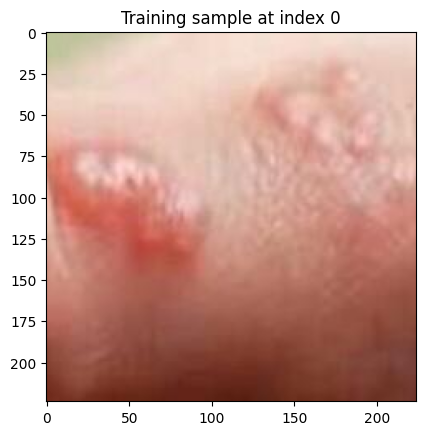

Pixel values of the first training sample:
[[[190 197 153]
  [190 197 153]
  [190 197 155]
  ...
  [246 226 219]
  [246 226 219]
  [246 226 219]]

 [[190 197 153]
  [190 197 153]
  [190 197 155]
  ...
  [245 225 218]
  [246 226 219]
  [246 226 219]]

 [[190 197 153]
  [190 197 153]
  [190 197 155]
  ...
  [244 224 215]
  [245 225 216]
  [245 225 216]]

 ...

 [[111  42  27]
  [111  42  27]
  [112  43  28]
  ...
  [112  55  46]
  [110  53  44]
  [109  52  43]]

 [[111  42  27]
  [112  43  28]
  [113  44  29]
  ...
  [111  54  45]
  [109  52  43]
  [108  51  42]]

 [[112  43  28]
  [112  43  28]
  [113  44  29]
  ...
  [111  54  45]
  [109  52  43]
  [108  51  42]]]


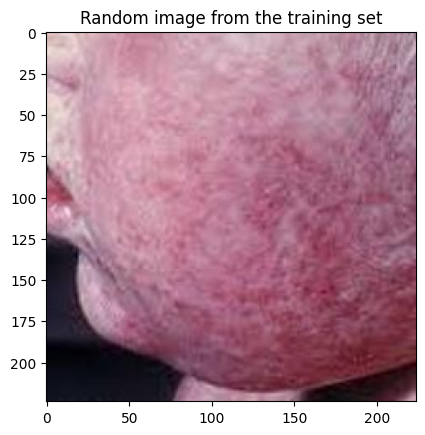

In [ ]:
# Visualize the first training sample
plt.imshow(x_train[0])
plt.title("Training sample at index 0")
plt.show()

# Print the pixel values of the first training sample
print("Pixel values of the first training sample:")
print(x_train[0])

# Get a random image from the training set
random_index = np.random.randint(0, len(x_train))
random_image = x_train[random_index]

# Display the random image
plt.imshow(random_image)
plt.title("Random image from the training set")
plt.show()

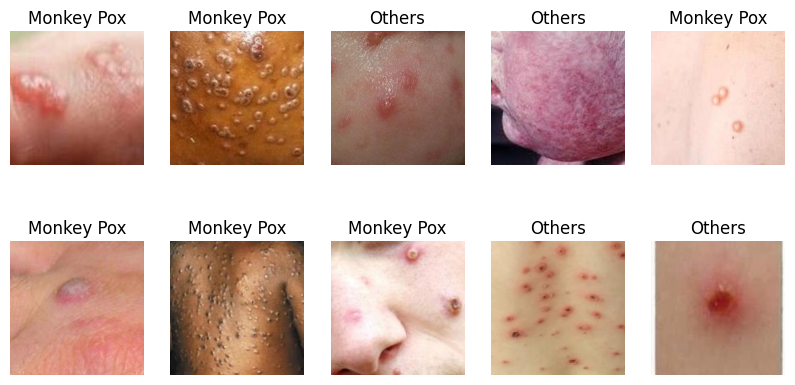

In [ ]:
# Plot 10 images with each shape size 5,5
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for i, ax in enumerate(axes.flat):
  ax.imshow(x_train[i])
  ax.set_title(y_train[i])
  ax.axis('off')

plt.show()

**Change data type**

In [ ]:
# Print the data type of the training and testing sets
print("Data type of x_train before conversion:", x_train.dtype)
print("Data type of x_test before conversion:", x_test.dtype)

# Convert the data type of the training and testing sets to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Print the data type of the training and testing sets after conversion
print("Data type of x_train after conversion:", x_train.dtype)
print("Data type of x_test after conversion:", x_test.dtype)

Data type of x_train before conversion: uint8
Data type of x_test before conversion: uint8
Data type of x_train after conversion: float32
Data type of x_test after conversion: float32


In [ ]:
import random

# Select a random sample from the training set
random_sample = x_train[random.randint(0, len(x_train) - 1)]

# Print the minimum and maximum values of the random sample
print("Minimum value of the random sample:", random_sample.min())
print("Maximum value of the random sample:", random_sample.max())

Minimum value of the random sample: 20.0
Maximum value of the random sample: 255.0


In [ ]:
# Rescale the pixel values of the training and testing sets
x_train /= 255.0
x_test /= 255.0

# Print the minimum and maximum values of the rescaled random sample
print("Minimum value of the rescaled random sample:", random_sample.min())
print("Maximum value of the rescaled random sample:", random_sample.max())

#It would be between 0 to 1

Minimum value of the rescaled random sample: 0.078431375
Maximum value of the rescaled random sample: 1.0


In [ ]:
print("Length of x_train:", len(x_train))
print("Length of y_train:", len(y_train))
print("Length of x_test:", len(x_test))
print("Length of y_test:", len(y_test))

Length of x_train: 101
Length of y_train: 101
Length of x_test: 101
Length of y_test: 101


In [ ]:
print("Shape of one train data:", x_train[0].shape)
print("Shape of one test data:", x_test[0].shape)

Shape of one train data: (224, 224, 3)
Shape of one test data: (224, 224, 3)


In [ ]:
#expanding X train , X test to 4D by adding a dimention at the end

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("Shape of one train data after expanding:", x_train[0].shape)
print("Shape of one test data after expanding:", x_test[0].shape)

Shape of one train data after expanding: (224, 224, 3, 1)
Shape of one test data after expanding: (224, 224, 3, 1)


In [ ]:
# prompt: match x and y same dimention

# Convert labels to one-hot encoded format
y_train = keras.utils.to_categorical(y_train, len(np.unique(y_train)))
y_test = keras.utils.to_categorical(y_test, len(np.unique(y_test)))

# Print the shape of the training and testing labels
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of y_train: (101, 2, 2, 2)
Shape of y_test: (101, 2, 2, 2)


In [ ]:
#binarize labels

from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

**Define model**

In [ ]:
from tensorflow.keras.layers import Input
model = Sequential()

# Define the input shape
input_shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3])

# Add the first convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))

# Add the first max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add the second max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the flatten layer
model.add(Flatten())

# Add the output layer
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



**Compile Model**

In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Epoch 1/10
4/4 [==============================] - 14s 4s/step - loss: 0.2471 - accuracy: 0.8515 - val_loss: 1.0509 - val_accuracy: 0.5842
Epoch 2/10
4/4 [==============================] - 13s 3s/step - loss: 0.1612 - accuracy: 0.9604 - val_loss: 1.3514 - val_accuracy: 0.6040
Epoch 3/10
4/4 [==============================] - 12s 3s/step - loss: 0.1496 - accuracy: 0.9208 - val_loss: 1.3926 - val_accuracy: 0.6436
Epoch 4/10
4/4 [==============================] - 16s 4s/step - loss: 0.1145 - accuracy: 0.9505 - val_loss: 1.7390 - val_accuracy: 0.6337
Epoch 5/10
4/4 [==============================] - 14s 4s/step - loss: 0.1150 - accuracy: 0.9604 - val_loss: 2.0070 - val_accuracy: 0.5743
Epoch 6/10
4/4 [==============================] - 14s 4s/step - loss: 0.2460 - accuracy: 0.9010 - val_loss: 1.6331 - val_accuracy: 0.5545
Epoch 7/10
4/4 [==============================] - 13s 4s/step - loss: 0.1353 - accuracy: 0.9604 - val_loss: 1.6020 - val_accuracy: 0.6139
Epoch 8/10
4/4 [==================

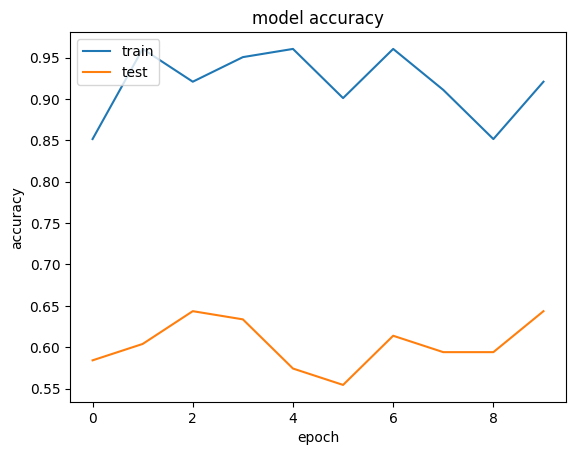

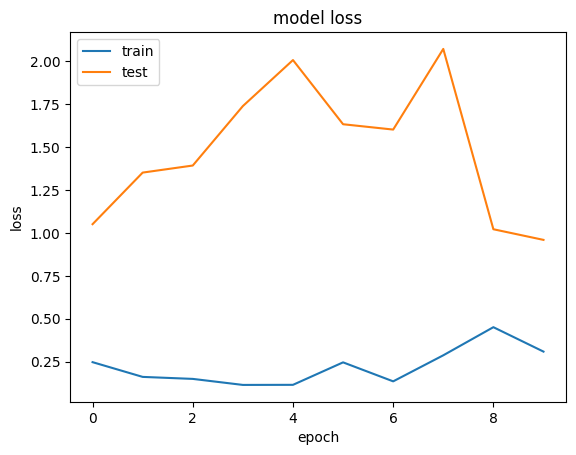

Test loss: 0.9594355821609497
Test accuracy: 0.6435643434524536


In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Summarize the model
model.summary()

# List all data in history
print(history.history.keys())

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

In [ ]:
# prompt: # Evaluate the model on the test data
# loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
# print('Test loss:', loss)
# print('Test accuracy:', accuracy) (like this find model accuracy

loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


NameError: name 'model' is not defined

  **Result and Discussion:**
  On a dataset of 228 photos with 102 images of monkey pox and 126 images of other skin diseases, I applied Convolutional Neural Networks (CNNs), which are used to categorize pictures of monkey pox and other skin conditions. The CNN demonstrated its ability for reliable classification with a test accuracy of roughly 0.644 and a test loss of 0.959. The CNN's ability to attain good accuracy even with insufficient data is indicative of its usefulness, especially with its modest architecture consisting of only two max-pooling layers and two convolutional layers. Nevertheless, accuracy can still be increased. This could be done by using data augmentation techniques, larger datasets, or more intricate CNN structures. Although further research is required to increase CNNs' accuracy, the study shows their potential for creating diagnostic tools for these illnesses.


 **Strengths of NN:**

 * High Accuracy: NNs are really good at looking at pictures and figuring out what they are, because they can learn tricky things about the pictures.

* Robustness: NNs can handle pictures that aren't perfect or have some mistakes in them, which is helpful in real life where things aren't always perfect.

* Adaptability: NNs can learn to recognize all sorts of pictures by changing a bit here and there, making them useful for lots of different jobs.

**Weaknesses of NN:**
* Overfitting: Sometimes NNs learn too much from the pictures they've seen and get confused by new ones, which can make them make mistakes.
* Computational Cost: Making NNs learn from lots of pictures can take a long time and use up a lot of computer power, especially if the pictures are complicated.
* Interpretability: NNs can be a bit like magic boxes – they know things, but it's hard for us to understand exactly how they know them, which can make it tricky to fix if they make a mistake.

# **Pt.1**

In [ ]:
#Dataset create
import numpy as np
dataset = np.array([0.34, 0.780])

In [ ]:
import tensorflow as tf

# Create a Sequential model
model = tf.keras.Sequential()
model.build(input_shape=(dataset.shape))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#create a perceptron
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid', use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None))

In [ ]:
#1D to 2D
dataset_batch= np.expand_dims(dataset, axis=0)
print(dataset_batch)
print(dataset_batch.shape)
model.build(dataset_batch.shape)

[[0.34 0.78]]
(1, 2)


In [ ]:
model.summary()
#param 3 cause here 2 weight w1, w2 and 1 bias

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (1, 1)                    3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#compile model

model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'],run_eagerly= True)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (1, 1)                    3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
features= dataset_batch
labels = np.array([[0]])
print(labels.shape)

(1, 1)


In [ ]:
import pandas as pd
df = pd.DataFrame(features)
df

,0,1
0,0.34,0.78


In [ ]:
df = pd.DataFrame(features, columns=['x1', 'x2'])

In [ ]:
#insert labels at 3rd column

df.insert(2, "labels", labels)

In [ ]:
X = df.drop('labels', axis=1)
X

,x1,x2
0,0.34,0.78


In [ ]:
Y = df['labels']
Y

0    0
Name: labels, dtype: int64

In [ ]:
#fit model with epoch 5

model.fit(X, Y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 103ms/step - loss: 1.5037 - accuracy: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 0s 26ms/step - loss: 1.4933 - accuracy: 0.0000e+00
Epoch 3/5
1/1 [==============================] - 0s 25ms/step - loss: 1.4829 - accuracy: 0.0000e+00
Epoch 4/5
1/1 [==============================] - 0s 22ms/step - loss: 1.4726 - accuracy: 0.0000e+00
Epoch 5/5
1/1 [==============================] - 0s 24ms/step - loss: 1.4624 - accuracy: 0.0000e+00


In [ ]:
#Random  test input
test_input = np.array([1, 1])
#Expnading dims
test_input_expanded = np.expand_dims(test_input, axis=0)
print(test_input_expanded.shape)

(1, 2)


In [ ]:
#model predict
model.predict(test_input_expanded)

1/1 [==============================] - 0s 26ms/step


array([[0.87597775]], dtype=float32)

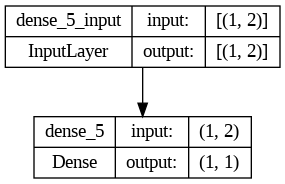

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

Epoch 1/5
1/1 [==============================] - 1s 975ms/step - loss: 1.4523 - accuracy: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 0s 13ms/step - loss: 1.3527 - accuracy: 0.0000e+00
Epoch 3/5
1/1 [==============================] - 0s 19ms/step - loss: 1.1850 - accuracy: 0.0000e+00
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 0.9826 - accuracy: 0.0000e+00
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 0.7767 - accuracy: 0.0000e+00


In [ ]:
#Step based
import math

def step_decay(epoch):
  initial_lr = 0.1
  drop = 0.5
  epochs_drop = 2
  final_lr= initial_lr * math.pow(drop, math.floor( (1+epoch)/ epochs_drop))

  return final_lr

  sgd= SGD(learning_rate= 0.0, momentum = 0.9)
